# 평균제곱오차 (MSE)

In [ ]:
import numpy as np

def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))



0.09750000000000003

In [ ]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.5975

# 교차 엔트로피 오차(CEE)

In [ ]:
def cross_entropy_error(y, t):
    delta = 1e-7   # log의 진수 부분이 0이 되지 않도록 아주 작은 값을 더한다.
    return -np.sum(t * np.log(y + delta))

In [ ]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [ ]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

### 2024년 9월 23일

In [ ]:
pip install python-mnist


In [ ]:
import tensorflow as tf

# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 데이터 확인
print(f"Training data shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Labels shape: {y_test.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28), Labels shape: (60000,)
Test data shape: (10000, 28, 28), Labels shape: (10000,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# MNIST 데이터셋 로드
(x_train, t_train), (x_test, t_test) = tf.keras.datasets.mnist.load_data()

# 정규화: 0~255 사이의 값을 0~1 사이로 변환
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 원-핫 인코딩
t_train = to_categorical(t_train, 10)  # 10은 클래스 수 (0-9)
t_test = to_categorical(t_test, 10)

# 데이터 확인
print(f"x_train shape: {x_train.shape}, t_train shape: {t_train.shape}")
print(f"x_test shape: {x_test.shape}, t_test shape: {t_test.shape}")


x_train shape: (60000, 28, 28), t_train shape: (60000, 10)
x_test shape: (10000, 28, 28), t_test shape: (10000, 10)


In [ ]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [ ]:
np.random.choice(60000, 10)

array([49314, 41116, 10853, 47141, 50656, 54802,  6476, 33465, 49128,
       13325])

In [ ]:
# 배치용 교차 엔트로피 오차

def cross_entropy_error(y, t):
    if y.ndim == 1:           # 데이터 하나당 교차 엔트로피 오차를 구하는 경우, 형상 변환
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]   # 배치 크기
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

y.ndim == 1 조건:

입력 데이터 y가 1차원인 경우 (즉, 배치가 아니라 단일 데이터의 경우), 교차 엔트로피 오차를 계산하기 위해 입력 데이터의 형상을 맞춰줍니다.
1차원인 경우 y와 t의 형태를 2차원으로 바꿉니다. reshape(1, size)는 (1, size) 형태의 2차원 배열로 변환합니다. 이렇게 변환함으로써 함수가 배치와 단일 데이터를 모두 처리할 수 있게 됩니다.

y = [0.2, 0.7, 0.1]이면 y = [[0.2, 0.7, 0.1]]로 변환

## 수치 미분

In [ ]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [ ]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

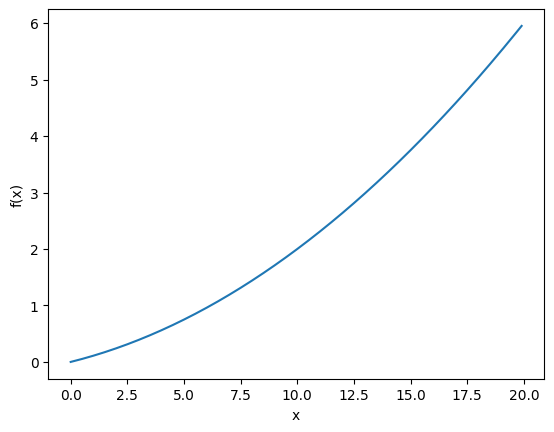

In [ ]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [ ]:
numerical_diff(function_1, 5)

0.1999999999990898

In [ ]:
numerical_diff(function_1, 10)

0.2999999999986347

## 편미분

In [ ]:
def function(x):   # 변수가 2개인 함수
    return x[0]**2 + x[1]**2

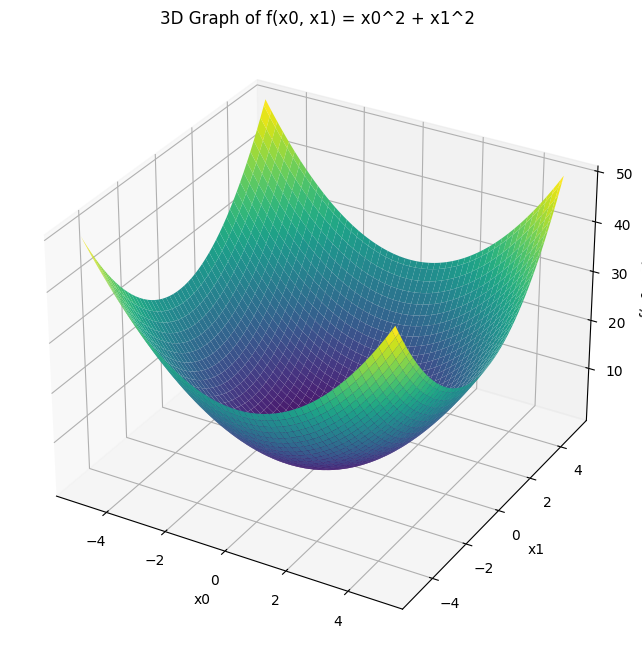

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# 그리드를 생성하여 x0, x1 좌표 만들기
x0 = np.linspace(-5, 5, 100)
x1 = np.linspace(-5, 5, 100)
X0, X1 = np.meshgrid(x0, x1)

# 함수 값 계산
Z = X0**2 + X1**2

# 3D 그래프 그리기
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# X0, X1, Z 값으로 3D 그래프 그리기
ax.plot_surface(X0, X1, Z, cmap='viridis', edgecolor='none')

# 축 및 제목 설정
ax.set_title("3D Graph of f(x0, x1) = x0^2 + x1^2")
ax.set_xlabel("x0")
ax.set_ylabel("x1")
ax.set_zlabel("f(x0, x1)")

plt.show()

In [ ]:
def function_tmp(x0):   # x1 값이 4로 고정된 새로운 함수 정의
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp, 3.0)

6.00000000000378

# 기울기

In [5]:
import numpy as np

def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)   # x와 같은 형상인 0 배열 생성

    for idx in range(x.size):
        tmp_val = x[idx]

        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val   # 값 복원

    return grad

In [6]:
def function_2(x): # define the function_2
    return x[0]**2 + x[1]**2
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

# 경사하강법

In [7]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):   # lr: 학습률, step_num: 반복 횟수
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [9]:
def function_2(x) :
  return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
print(init_x)
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=1000)


[-3.  4.]


array([-5.65129794e-21,  4.96308368e-21])

# 신경망에서의 기울기

In [13]:
import numpy as np

def softmax(x):
    exp_x = np.exp(x - np.max(x))  # prevent overflow
    return exp_x / np.sum(exp_x)

# 간단한 신경망
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)   # 2x3 형상의 가중치 매개변수

    def predict(self, x):   # 예측 수행
        return np.dot(x, self.W)

    def loss(self, x, t):   # 손실 함수 값 구하기
        z = self.predict(x)
        y = softmax(z)

        # Define cross_entropy_error function
        def cross_entropy_error(y, t):
            if y.ndim == 1:
                t = t.reshape(1, t.size)
                y = y.reshape(1, y.size)

            # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
            if t.size == y.size:
                t = t.argmax(axis=1)

            batch_size = y.shape[0]
            return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

        loss = cross_entropy_error(y, t)

        return loss

# W를 인수로 받아 손실 함수 계산하는 함수
def f(W):
    return net.loss(x, t)


# main문
if __name__ == "__main__":
    net = simpleNet()          # 가중치 매개변수 초기화

    x = np.array([0.6, 0.9])   # 입력
    p = net.predict(x)         # 예측 수행
    print("예측 결과:", p)     # 예측 결과 출력

    t = np.array([0, 0, 1])    # 정답 레이블
    loss = net.loss(x, t)      # 손실 값 계산
    print("손실 값:", loss)    # 손실 값 출력


예측 결과: [ 2.17913965  0.37834714 -3.13455397]
손실 값: 5.470751931678765
